In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math
from cycler import cycler
import itertools

import scipy.signal as signal # 离散点 极值
%matplotlib inline

In [2]:
!pwd

/home/rachpt/python/qprop/data-change-potential/400-100cs


In [4]:
# 路径
data_dir = '/home/rachpt/python/qprop/data-change-potential/400-100cs/'
# files = sorted(tuple(os.walk(data_dir, topdown=False))[0][2])[0:2]
# sorted(files)
# tuple(os.walk(data_dir, topdown=False))
files = ! ls *.dat
files

['01-xe-400-6e13-1-5.1.1-100cs_tsurff_polar.dat',
 '02-xe-400-7e13-1-5.1.1-100cs_tsurff_polar.dat',
 '03-xe-400-8e13-1-5.1.1-100cs_tsurff_polar.dat',
 '04-xe-400-9e13-1-5.1.1-100cs_tsurff_polar.dat',
 '05-xe-400-1e14-1-5.1.1-100cs_tsurff_polar.dat',
 '06-xe-400-1.2e14-1-5.1.1-100cs_tsurff_polar.dat']

In [19]:
files = ['xe-6e13-.-1+1-50cs_tsurff_polar.dat',
        'xe-8e13-.-1+1-40cs_tsurff_polar.dat',
        'xe-6e13-.-1-50cs_tsurff_polar.dat',
        'xe-8e13-.-1-40cs_tsurff_polar.dat',
         'xe-6e13-.1-50cs_tsurff_polar.dat',
         'xe-8e13-.1-40cs_tsurff_polar.dat',
         'xe-8e13-.1-50cs_tsurff_polar.dat']

# 动量积分 数据

In [5]:
def add_r(f):
    # r 积分
    with open(f, 'r') as f:
        data = {}
        line = f.readline()
        while line:
            if line != '\n':
                tmp = list(map(lambda x: float(x), list(line.split())))
                # print('test', tmp[1], tmp[4])
                if tmp[1] in data:
                    data[tmp[1]] += tmp[4]
                else:
                    data[tmp[1]] = tmp[4]
            line = f.readline()
        return data

def find_max(data):
#     data = add_r(f)
    x = list(data.keys())
    y = list(data.values())
    indexs = signal.argrelextrema(np.array(list(data.values())), np.greater)[0].tolist()
    _x = []
    _y = []
    for i in indexs:
        if y[i] >= 2:
            _x.append(x[i])
            _y.append(y[i])
    
    return _x, _y

# x, y = find_max(data_dir + 'tsurff-polar-xe-6e13-.-1-100cs.dat')
# x

# 按动量积分画图 subplot

In [22]:
def gen_r_int_sub(files):
    plt.figure(figsize=(88,50))
    plt.subplots_adjust(wspace = .1, hspace = .18)
    col = 2 # 3列
    row = int(math.ceil(len(files)/float(col)))
    for i, file in enumerate(files):
        name = os.path.splitext(file)[0]
        data = add_r(data_dir + file)
        xx, yy = find_max(data)
        plt.subplot(row,col,i+1)
#         plt.plot(data.keys(), data.values()) # 动量
        plt.plot(np.array(list(data.keys())) ** 2 / 2 * 27.2, data.values()) # 能量
        # 画极值点
        E_x = np.array(xx) ** 2 / 2 * 27.2
        In = np.array(yy)
        plt.scatter(E_x, In)
        y0=0
        for x, y in zip(E_x.tolist(), yy):
            if y > 10:
                plt.text(x,y+max(yy)/(4*(y-y0)),'{:.3f}'.format(x),fontsize=26)
                y0=y # 分开密集点
        
        plt.title(name, size=46)
        plt.xticks(size=30)
        plt.yticks(size=30)
        plt.tick_params(size=20)
        # extral
        plt.grid()
        plt.xticks(np.arange(0.5,11.5,0.5))
        plt.xlim(0.5, 11.5)


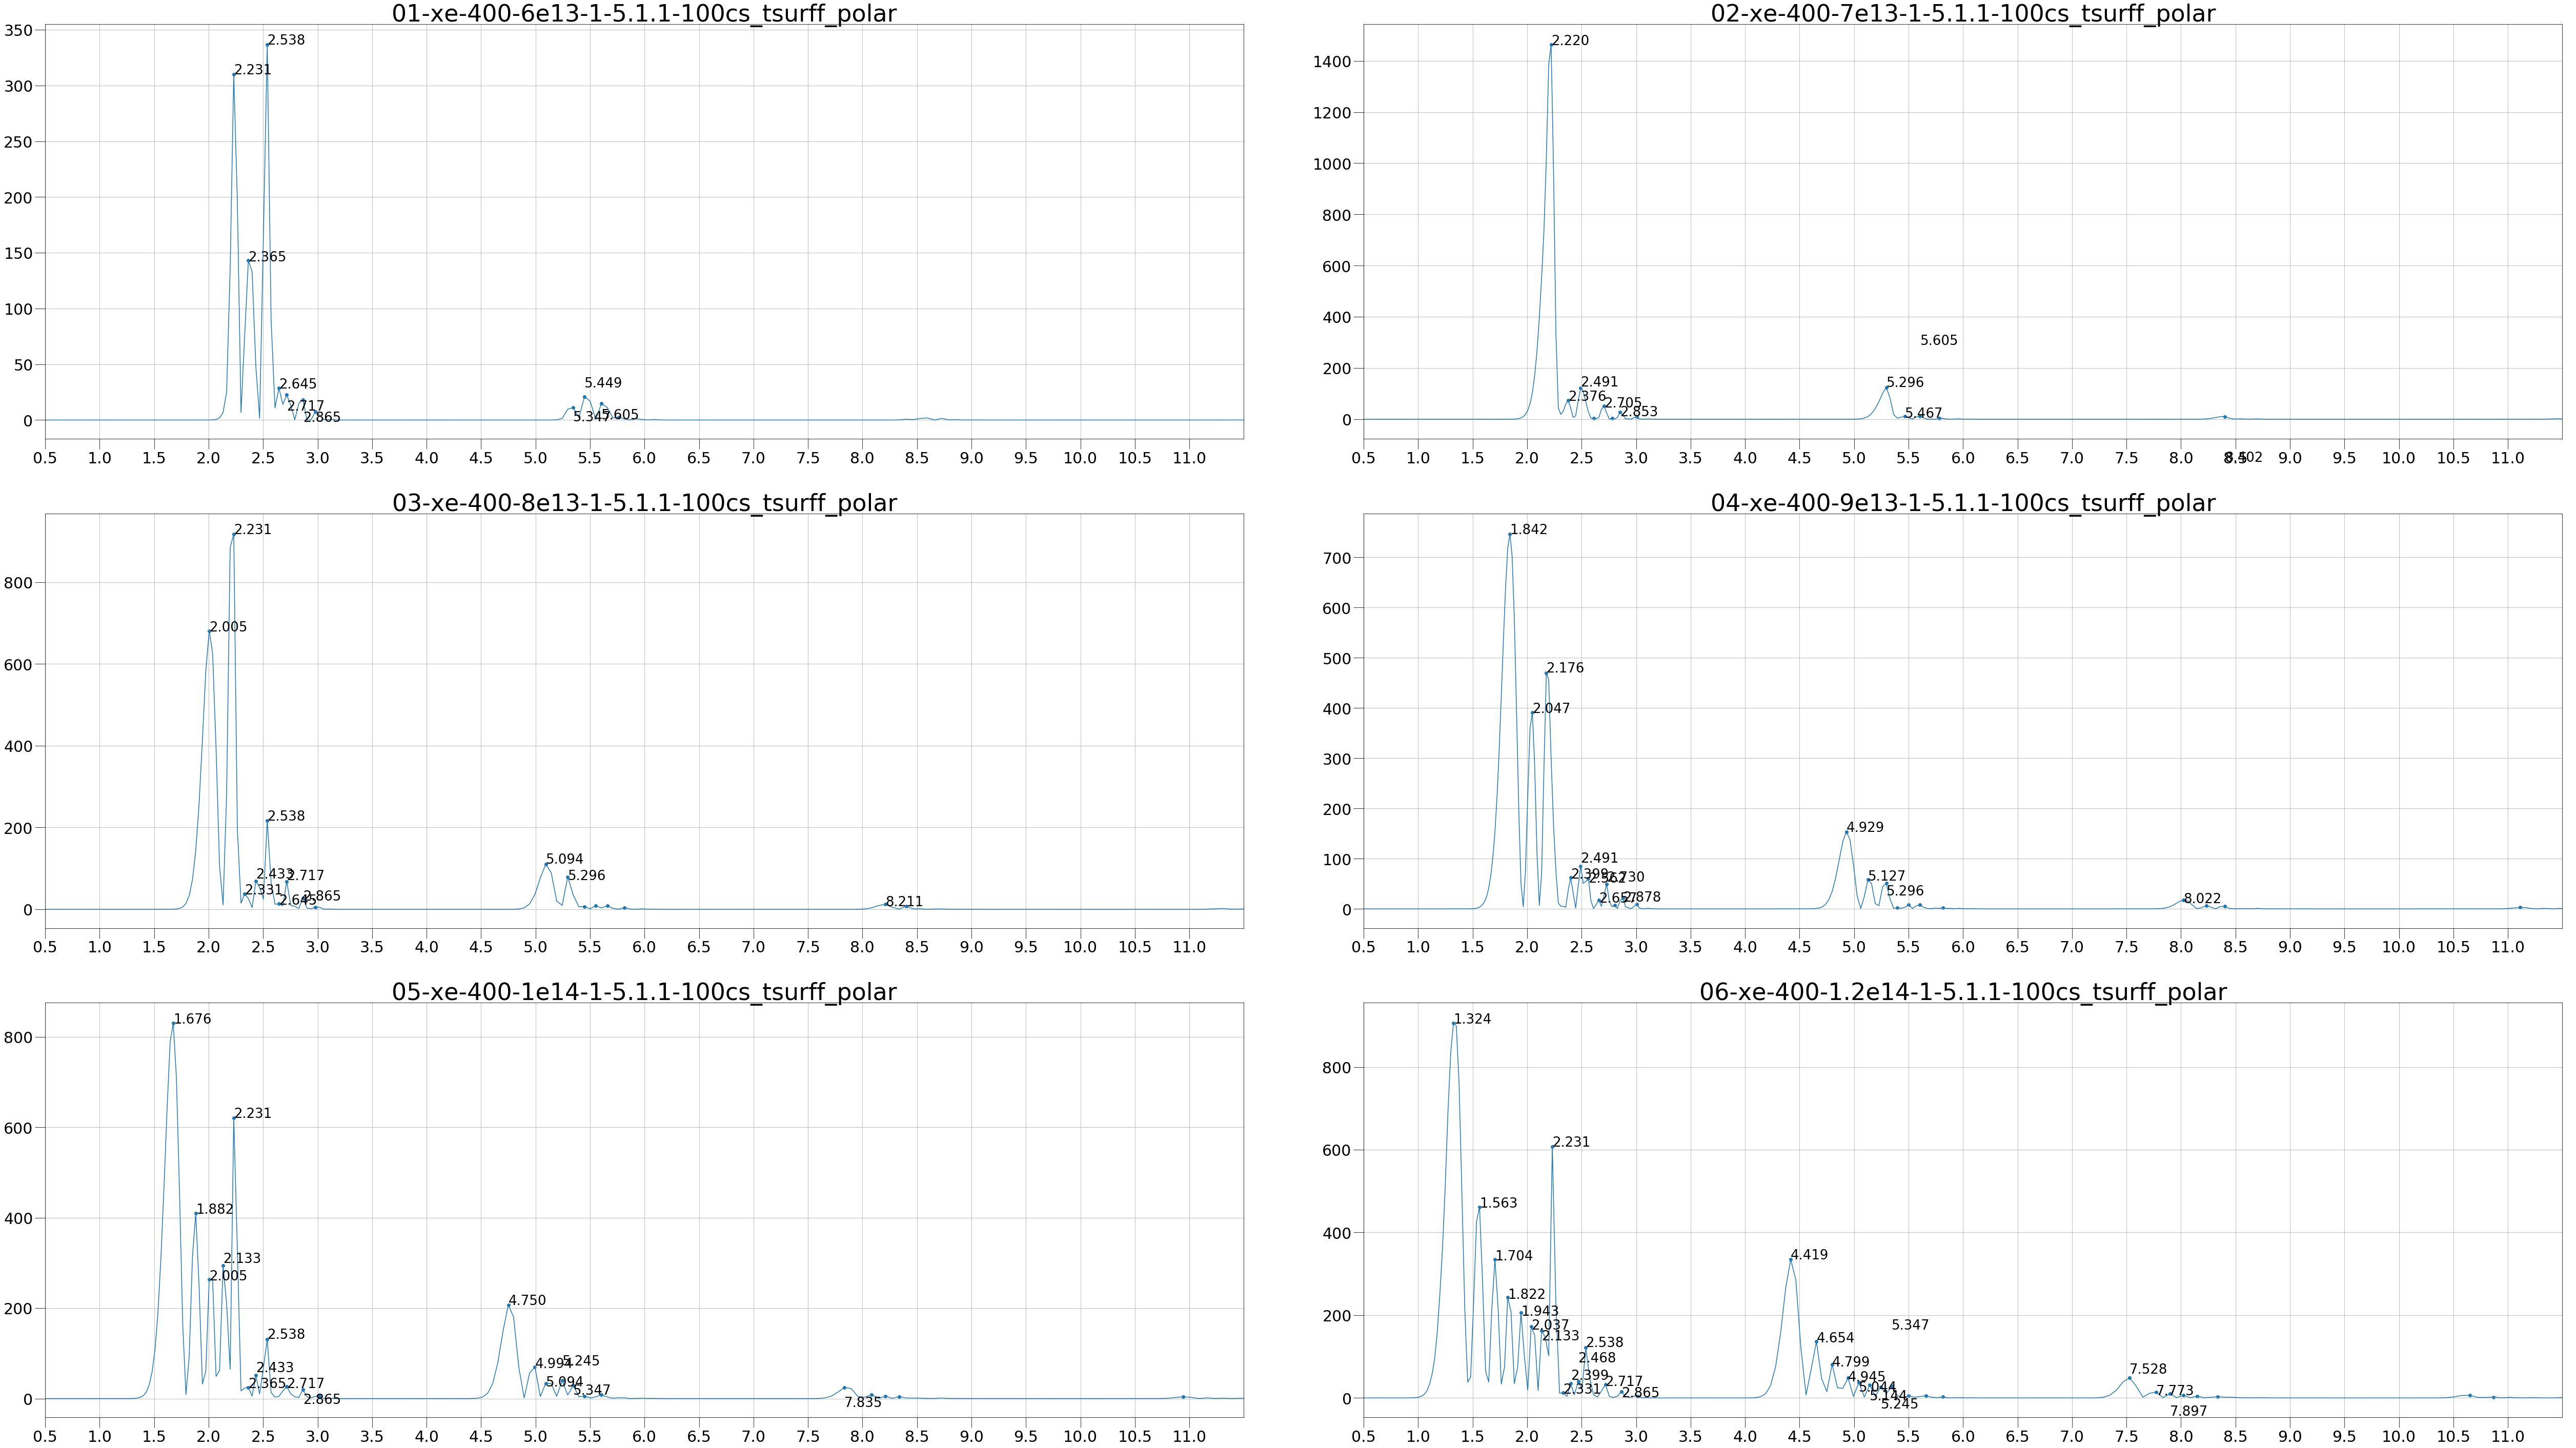

In [23]:
gen_r_int_sub(files)

## 在一张图中展示所有环位置

In [13]:
def gen_r_int_total(files, data_dir):
    plt.figure(figsize=(70,30))
    plt.xticks(size=30)
    plt.yticks(size=30)
    plt.tick_params(size=20)
    linestyle_cycler = (cycler(color=['r', 'g', 'b', 'y', 'k', 'm', 'c']) + 
                        cycler(linestyle=['-','--',':','-.', '--','-.',':']))
    plt.rc('axes', prop_cycle=linestyle_cycler)
    plt.rc('lines', linewidth=3)
    marker = itertools.cycle(('X', '+', '.', 'p', '*', 'x', '2', '^', '<', 'd','|','v'))
    for i, file in enumerate(files):
        name = os.path.splitext(file)[0]
        data = add_r(data_dir + file)
        plt.plot(data.keys(), data.values(), markersize=16, marker=next(marker), label=name)
        max_k = max(data, key = data.get)
        plt.plot([max_k, max_k],[0, data[max_k],], '--', linewidth=1)
#         plt.annotate(max_k,xytext=(max_k,data[max_k]),xy=(max_k,data[max_k]))
        plt.text(max_k,data[max_k],'{:.4f}'.format(max_k),fontsize=26)
        plt.title('total', size=30)
    plt.legend(prop={'size': 50})
    plt.xlim(0.25, 0.8)
    plt.grid()
    plt.xticks(np.arange(0.25,0.8,0.02))
    plt.yticks(np.arange(0,1000,100))


In [ ]:
gen_r_int_total(files, data_dir)

## 环角度分布

In [ ]:
f = '/home/rachpt/python/qprop/data/xe-400-1e14-1-5.1.1-100cs.dat'
min_r = 0.32
max_r = 0.36
with open(f, 'r') as f:
    data = {}
    line = f.readline()
    while line:
        if line != '\n':
            tmp = list(map(lambda x: float(x), list(line.split())))
            # print('test', tmp[1], tmp[4])
            if min_r <= tmp[1] <= max_r:
                if tmp[3] in data:
                    data[tmp[3]] += tmp[4]
                else:
                    data[tmp[3]] = tmp[4]
        line = f.readline()
    data[0.0] /= 2
    plt.figure(figsize=(40,30))
    plt.scatter(data.keys(), data.values())